In [4]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [5]:
pip install fpdf

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import gradio as gr
from fpdf import FPDF
import os

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load and preprocess the data
data = pd.read_csv('dataset.csv')
description_data = pd.read_csv('symptom_Description.csv')
precaution_data = pd.read_csv('symptom_precaution.csv')
data.fillna('unknown', inplace=True)

In [9]:
data.shape

(4920, 18)

In [10]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
3,Fungal infection,itching,skin_rash,dischromic _patches,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


In [11]:
data.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,0
Symptom_5,0
Symptom_6,0
Symptom_7,0
Symptom_8,0
Symptom_9,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4920 non-null   object
 5   Symptom_5   4920 non-null   object
 6   Symptom_6   4920 non-null   object
 7   Symptom_7   4920 non-null   object
 8   Symptom_8   4920 non-null   object
 9   Symptom_9   4920 non-null   object
 10  Symptom_10  4920 non-null   object
 11  Symptom_11  4920 non-null   object
 12  Symptom_12  4920 non-null   object
 13  Symptom_13  4920 non-null   object
 14  Symptom_14  4920 non-null   object
 15  Symptom_15  4920 non-null   object
 16  Symptom_16  4920 non-null   object
 17  Symptom_17  4920 non-null   object
dtypes: object(18)
memory usage: 692.0+ KB


In [13]:
# Lowercase, strip, and replace underscores for consistency
for col in data.columns[1:]:
    data[col] = data[col].str.lower().str.strip().str.replace('_', ' ')

In [14]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
3,Fungal infection,itching,skin rash,dischromic patches,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
4,Fungal infection,itching,skin rash,nodal skin eruptions,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


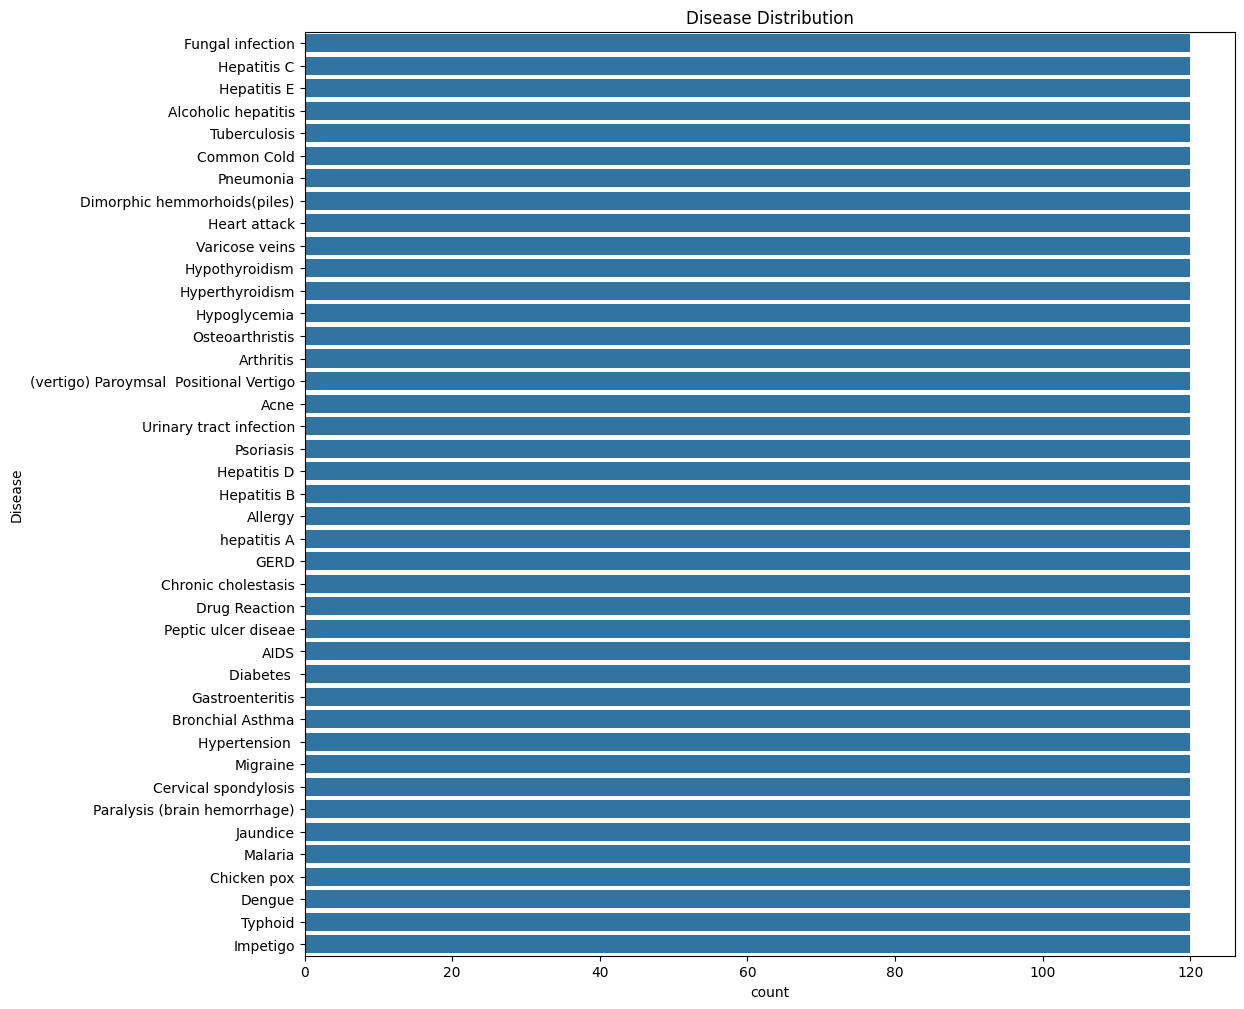

In [15]:
plt.figure(figsize=(12, 12))
sns.countplot(y='Disease', data=data, order=data['Disease'].value_counts().index)
plt.title('Disease Distribution')
plt.show()

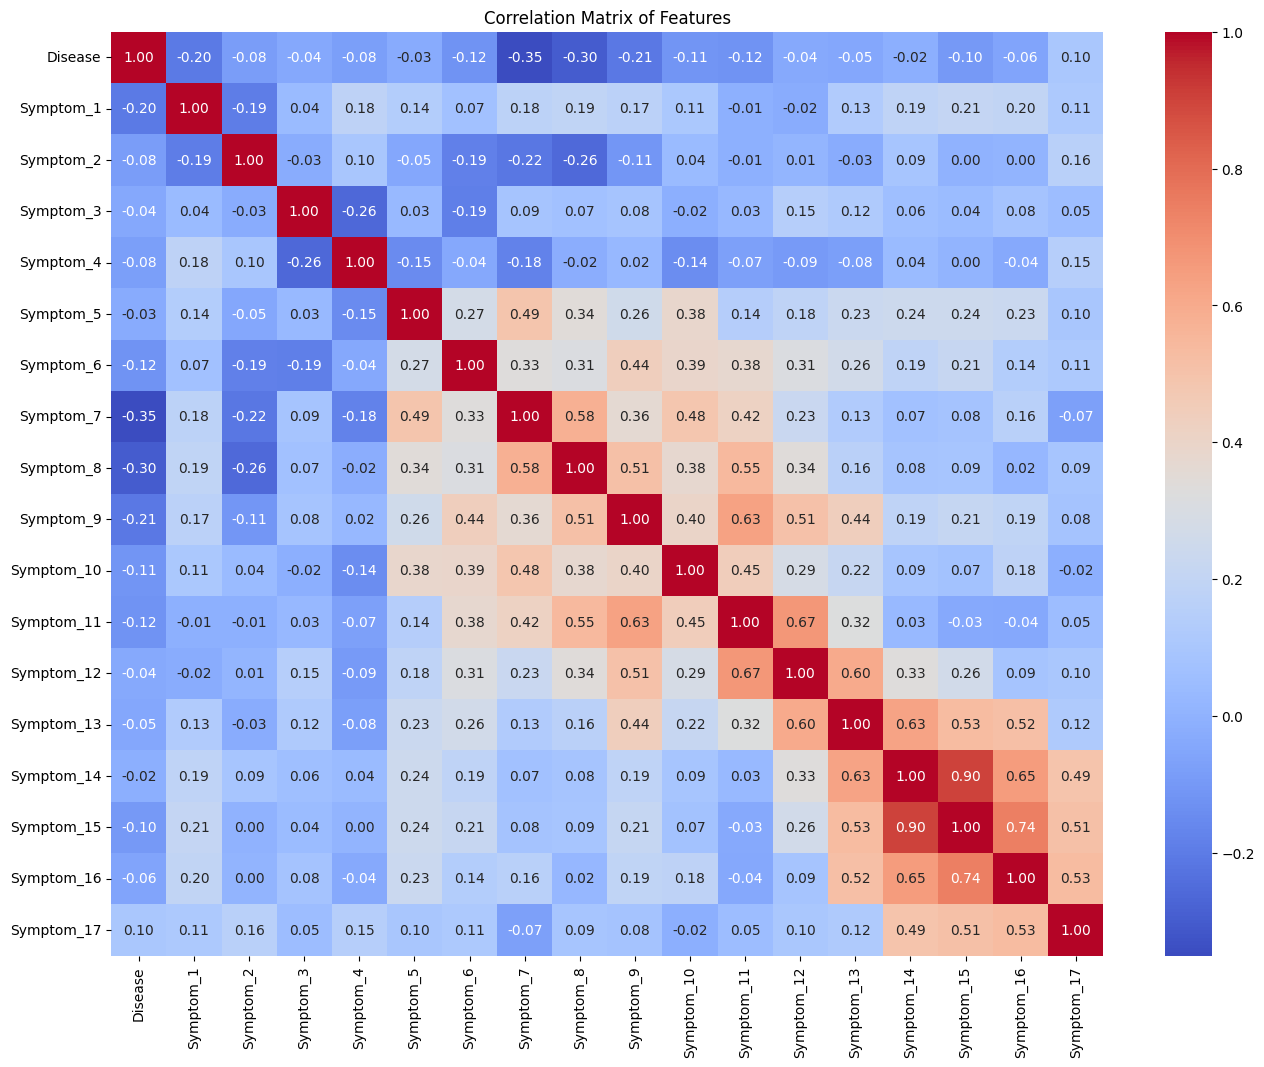

In [17]:
#To understand the correlation between different symptoms and the disease.

encoded_data = data.copy()
label_encoder = LabelEncoder()
for col in encoded_data.columns:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

plt.figure(figsize=(16, 12))
sns.heatmap(encoded_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()

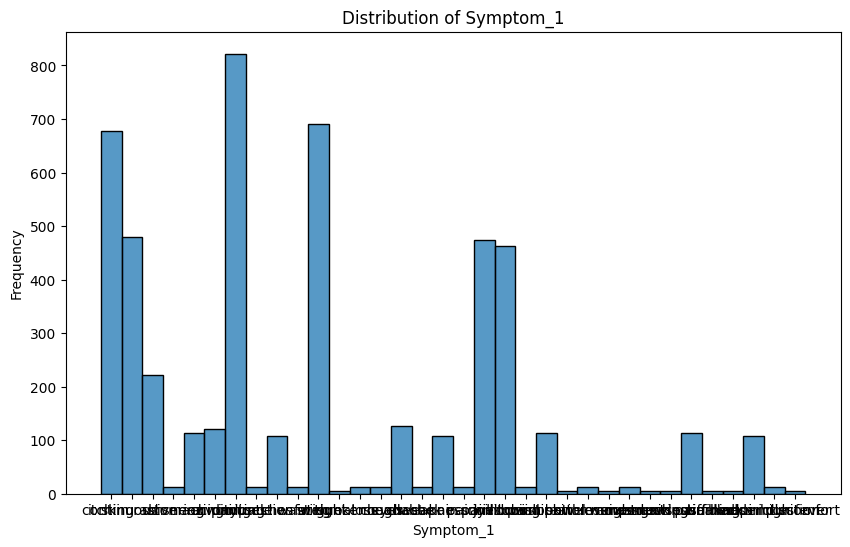

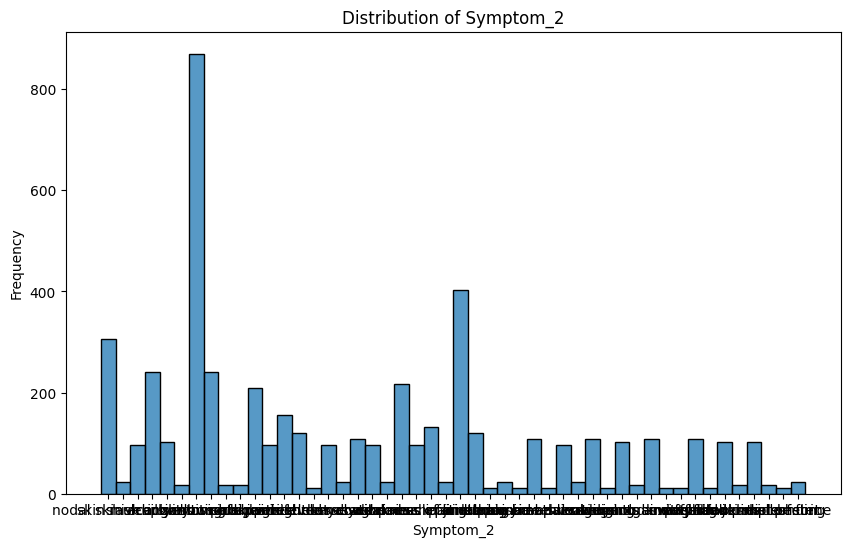

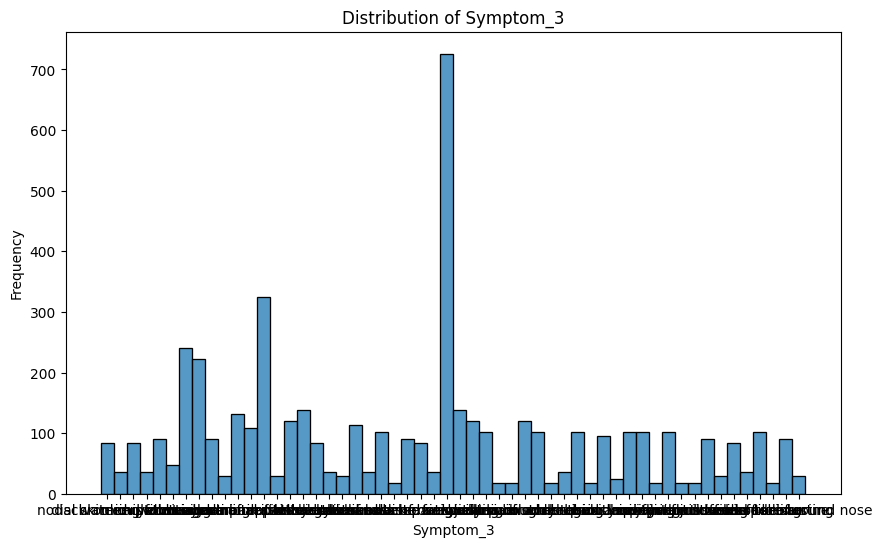

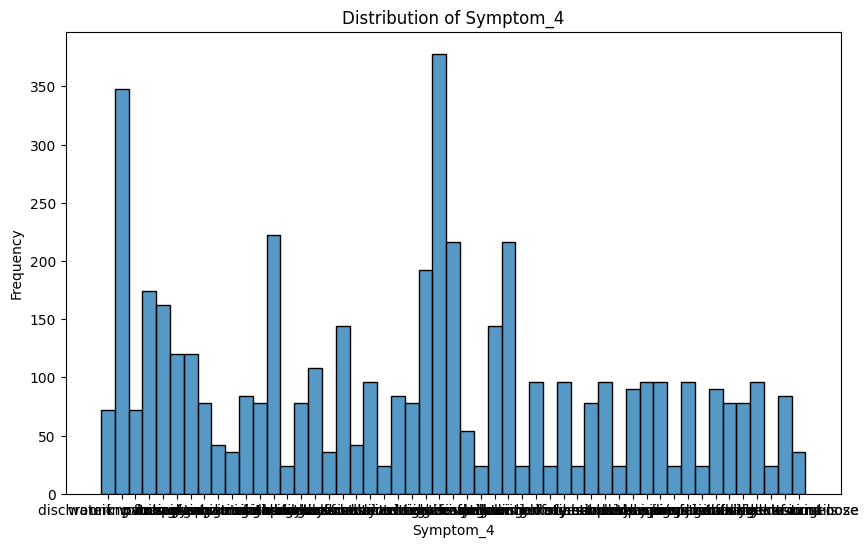

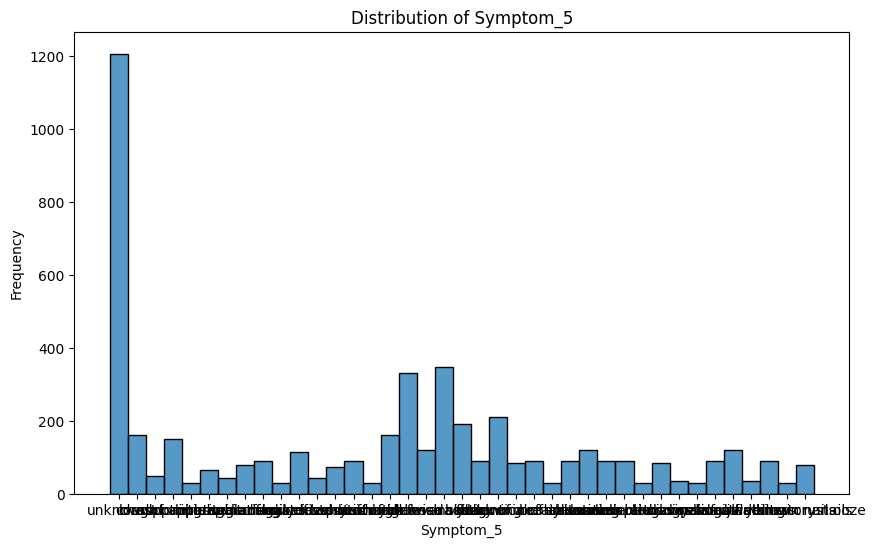

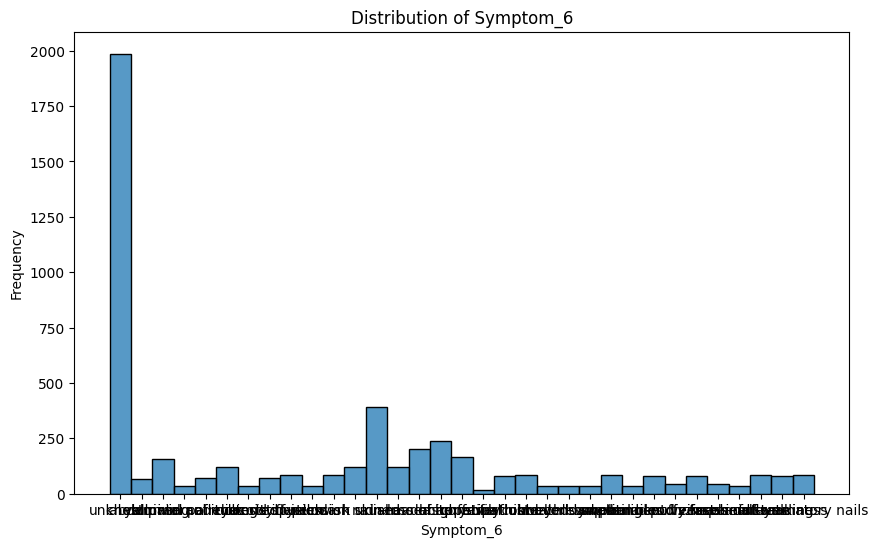

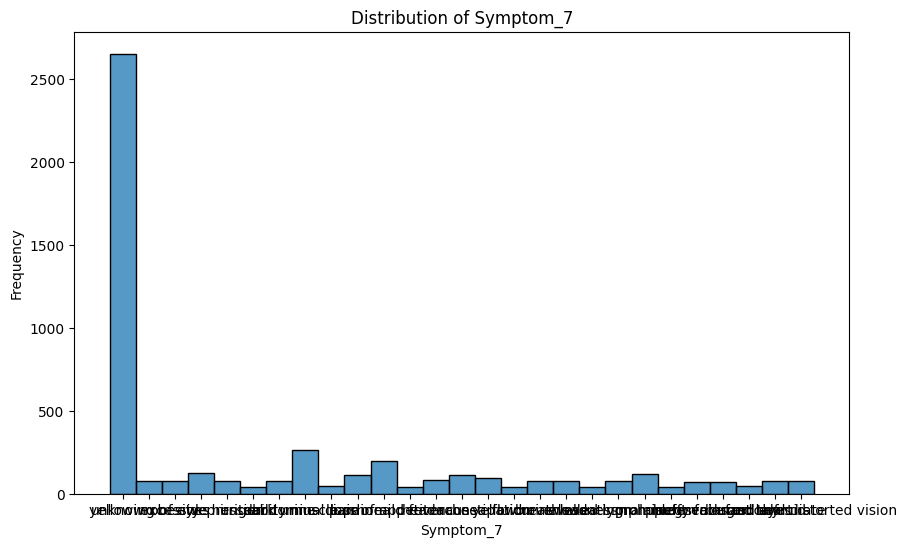

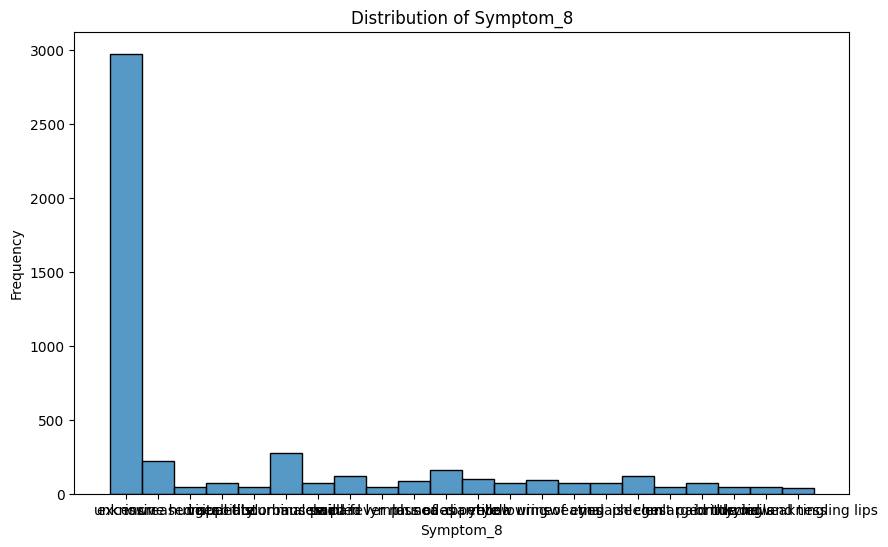

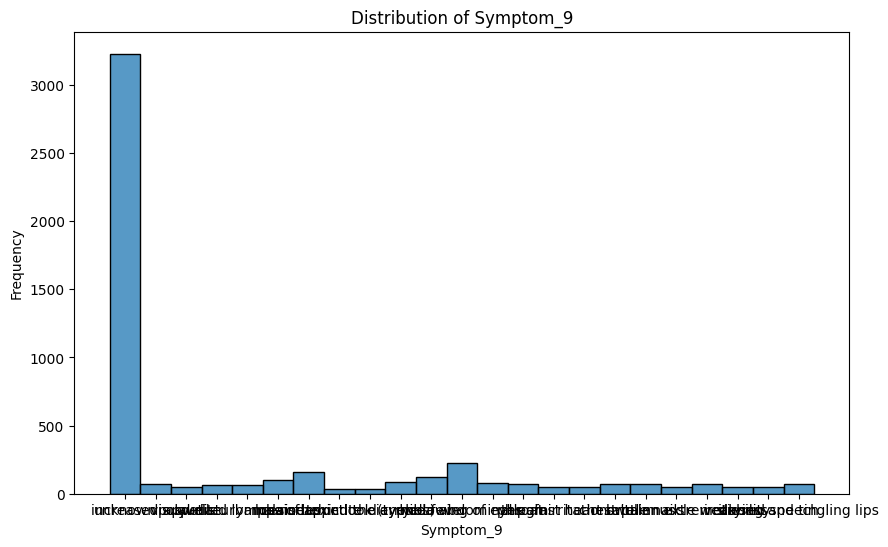

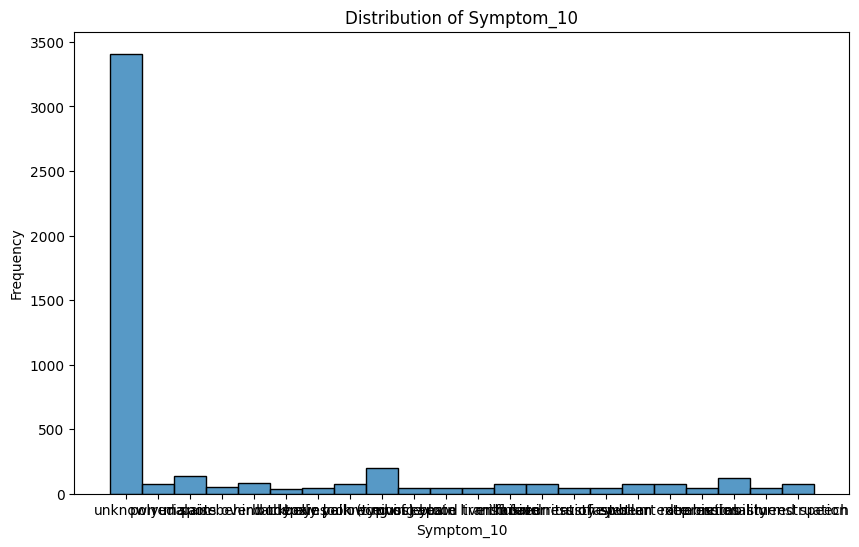

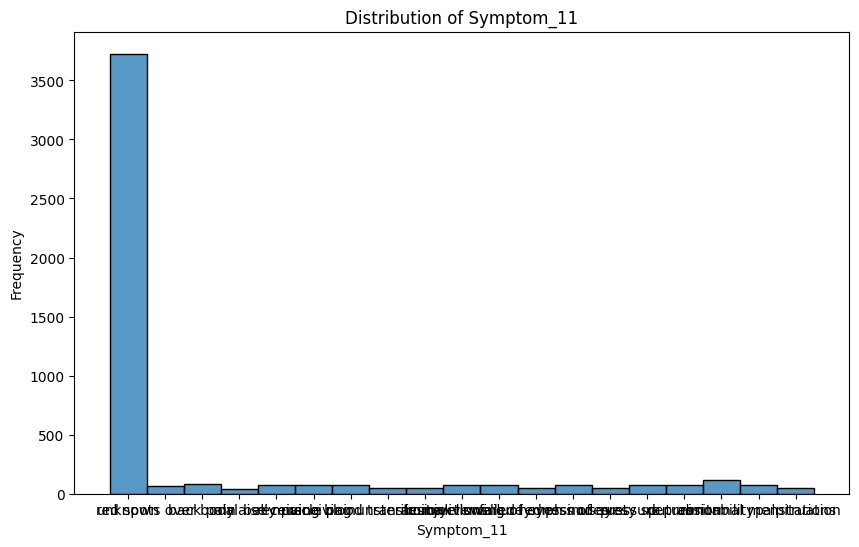

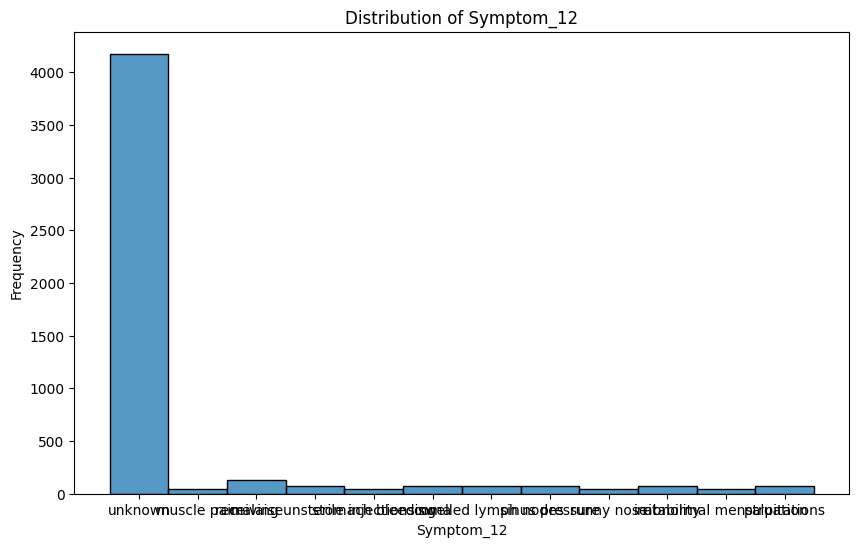

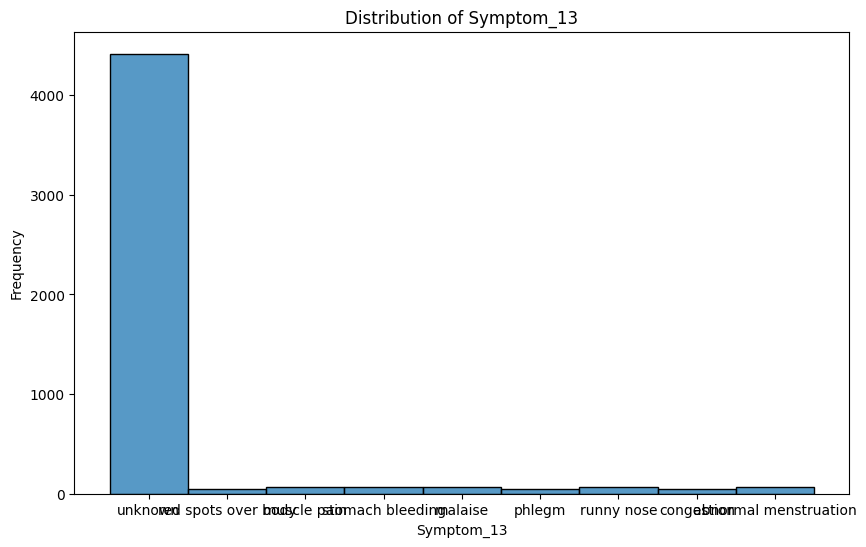

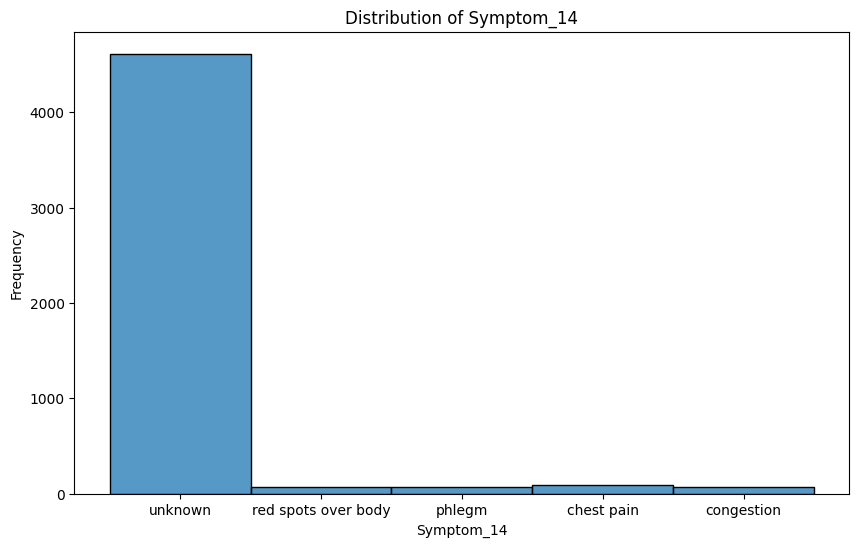

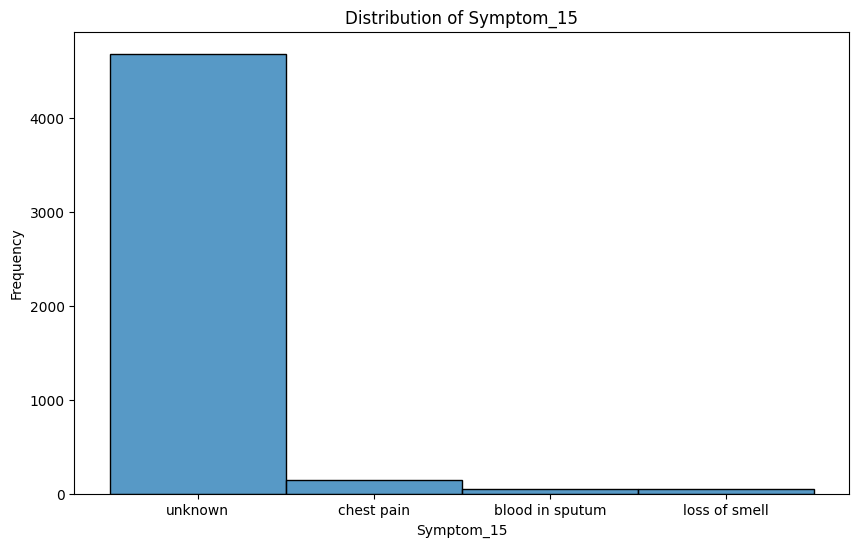

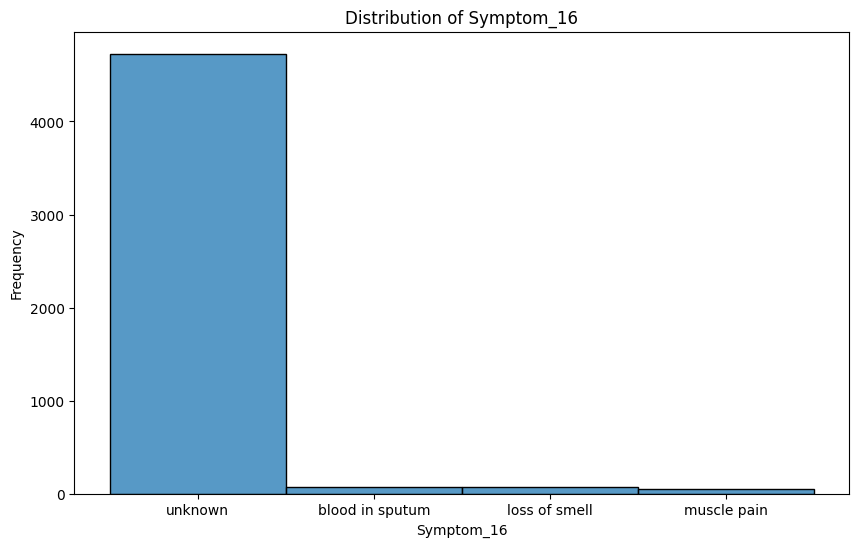

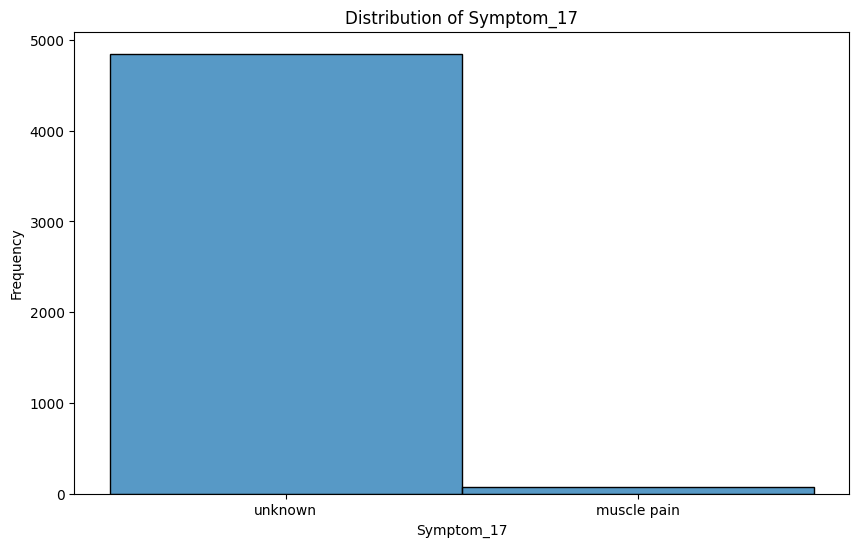

In [18]:
#Distribution of each symptom to see how they are spread across the dataset.
for col in data.columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=False, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [19]:
# Identify symptom columns (assume 'Disease' is the first column)
symptom_columns = data.columns[1:]

# Gather all unique symptoms across all symptom columns
unique_symptoms = pd.Series(data[symptom_columns].values.ravel()).dropna().unique()
symptom_to_number = {symptom: num for num, symptom in enumerate(unique_symptoms, start=101)}

# Print all unique values
print("Unique values from the entire dataset:")
for value in unique_symptoms:
    print(value)

Unique values from the entire dataset:
itching
skin rash
nodal skin eruptions
dischromic  patches
unknown
continuous sneezing
shivering
chills
watering from eyes
stomach pain
acidity
ulcers on tongue
vomiting
cough
chest pain
yellowish skin
nausea
loss of appetite
abdominal pain
yellowing of eyes
burning micturition
spotting  urination
passage of gases
internal itching
indigestion
muscle wasting
patches in throat
high fever
extra marital contacts
fatigue
weight loss
restlessness
lethargy
irregular sugar level
blurred and distorted vision
obesity
excessive hunger
increased appetite
polyuria
sunken eyes
dehydration
diarrhoea
breathlessness
family history
mucoid sputum
headache
dizziness
loss of balance
lack of concentration
stiff neck
depression
irritability
visual disturbances
back pain
weakness in limbs
neck pain
weakness of one body side
altered sensorium
dark urine
sweating
muscle pain
mild fever
swelled lymph nodes
malaise
red spots over body
joint pain
pain behind the eyes
constipa

In [20]:
# Create a dictionary to map each unique symptom to a unique number starting from 101
symptom_to_number = {symptom: num for num, symptom in enumerate(unique_symptoms, start=101)}

# Replace symptoms in the symptom columns with their corresponding unique numbers
for col in symptom_columns:
    data[col] = data[col].map(symptom_to_number).fillna(0).astype(int)

# Print the dictionary of unique symptoms and their corresponding numbers
print("Unique symptoms and their corresponding numbers:")
for symptom, number in symptom_to_number.items():
    print(f"{symptom}: {number}")

Unique symptoms and their corresponding numbers:
itching: 101
skin rash: 102
nodal skin eruptions: 103
dischromic  patches: 104
unknown: 105
continuous sneezing: 106
shivering: 107
chills: 108
watering from eyes: 109
stomach pain: 110
acidity: 111
ulcers on tongue: 112
vomiting: 113
cough: 114
chest pain: 115
yellowish skin: 116
nausea: 117
loss of appetite: 118
abdominal pain: 119
yellowing of eyes: 120
burning micturition: 121
spotting  urination: 122
passage of gases: 123
internal itching: 124
indigestion: 125
muscle wasting: 126
patches in throat: 127
high fever: 128
extra marital contacts: 129
fatigue: 130
weight loss: 131
restlessness: 132
lethargy: 133
irregular sugar level: 134
blurred and distorted vision: 135
obesity: 136
excessive hunger: 137
increased appetite: 138
polyuria: 139
sunken eyes: 140
dehydration: 141
diarrhoea: 142
breathlessness: 143
family history: 144
mucoid sputum: 145
headache: 146
dizziness: 147
loss of balance: 148
lack of concentration: 149
stiff neck: 1

In [21]:
# Encode the 'Disease' column
label_encoder = LabelEncoder()
data['Disease'] = label_encoder.fit_transform(data['Disease'])

In [22]:
# Get the mapping of each distinct disease to its encoded value
disease_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print all the distinct diseases with their encoded values
for disease, encoding in disease_mapping.items():
    print(f"{disease}: {encoding}")

(vertigo) Paroymsal  Positional Vertigo: 0
AIDS: 1
Acne: 2
Alcoholic hepatitis: 3
Allergy: 4
Arthritis: 5
Bronchial Asthma: 6
Cervical spondylosis: 7
Chicken pox: 8
Chronic cholestasis: 9
Common Cold: 10
Dengue: 11
Diabetes : 12
Dimorphic hemmorhoids(piles): 13
Drug Reaction: 14
Fungal infection: 15
GERD: 16
Gastroenteritis: 17
Heart attack: 18
Hepatitis B: 19
Hepatitis C: 20
Hepatitis D: 21
Hepatitis E: 22
Hypertension : 23
Hyperthyroidism: 24
Hypoglycemia: 25
Hypothyroidism: 26
Impetigo: 27
Jaundice: 28
Malaria: 29
Migraine: 30
Osteoarthristis: 31
Paralysis (brain hemorrhage): 32
Peptic ulcer diseae: 33
Pneumonia: 34
Psoriasis: 35
Tuberculosis: 36
Typhoid: 37
Urinary tract infection: 38
Varicose veins: 39
hepatitis A: 40


In [23]:
# Prepare training and test sets
X = data[data.columns[1:]]
y = data['Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV for parameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = best_rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

# Confidence Score
def get_confidence_score(symptoms_encoded):
    proba = best_rf_model.predict_proba(symptoms_encoded)
    confidence_score = round(max(proba[0]) * 100, 2)
    return confidence_score

    # PDF export
def export_to_pdf(symptoms, prediction, confidence_score, description, precaution):
    pdf = FPDF(format='A4')  # Standard A4 size for more space
    pdf.add_page()

    # Set title font and size
    pdf.set_font("Arial", style='B', size=16)
    pdf.cell(200, 10, txt="Disease Prediction Report", ln=True, align='C')
    pdf.ln(10)  # Add a blank line for spacing

    # Increase margin for neatness
    pdf.set_left_margin(15)
    pdf.set_right_margin(15)

    # Change to regular font for content
    pdf.set_font("Arial", size=12)

    # Define a function to wrap long text in the PDF
    def multi_line_text(label, content):
        pdf.set_font("Arial", style='B', size=12)
        pdf.cell(0, 10, label, ln=True)
        pdf.set_font("Arial", size=12)
        pdf.multi_cell(0, 10, content)
        pdf.ln(2)  # Small space after each section

    # Adding sections with wrapping and spacing
    multi_line_text("Symptoms:", symptoms)
    multi_line_text("Predicted Disease:", prediction)
    multi_line_text("Confidence Score:", f"{confidence_score}%")
    multi_line_text("Disease Description:", description)
    multi_line_text("Precaution:", precaution)

    # Output PDF with a specific filename
    pdf_output = "disease_prediction_report.pdf"
    pdf.output(pdf_output)
    return pdf_output

# Dictionaries for descriptions and precautions
disease_descriptions = dict(zip(description_data['Disease'].str.lower(), description_data['Description']))
disease_precautions = dict(zip(precaution_data['Disease'].str.lower(), precaution_data[['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].apply(lambda x: ', '.join(x.fillna('')), axis=1)))

def get_disease_description(disease):
    return disease_descriptions.get(disease.lower(), "No description available.")

def get_disease_precaution(disease):
    return disease_precautions.get(disease.lower(), "No precaution available.")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 1.0
Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
      

In [25]:
# Disease prediction
def predict_disease(symptoms_input):
    symptoms = symptoms_input.lower().split(",")
    symptoms = [symptom.strip() for symptom in symptoms]

    max_symptoms = 17
    symptoms = symptoms[:max_symptoms] + ["unknown"] * (max_symptoms - len(symptoms))

    symptoms_encoded = pd.DataFrame(0, index=[0], columns=X.columns)
    for i, symptom in enumerate(symptoms):
        if symptom in symptom_to_number:
            symptoms_encoded.iloc[0, i] = symptom_to_number[symptom]

    prediction = best_rf_model.predict(symptoms_encoded)[0]
    disease = label_encoder.inverse_transform([prediction])[0]

    confidence_score = get_confidence_score(symptoms_encoded)
    disease_description = get_disease_description(disease)
    disease_precaution = get_disease_precaution(disease)

    pdf_file = export_to_pdf(symptoms_input, disease, confidence_score, disease_description, disease_precaution)
    return disease, confidence_score, disease_description, disease_precaution, pdf_file

In [26]:
# Gradio Interface
def interface():
    with gr.Blocks() as interface:
        gr.Markdown("## Illness Intel: Disease Prediction System")

        symptom_input = gr.Textbox(label="Enter symptoms (separated by commas)", lines=2, placeholder="e.g., cough, fever, headache")
        prediction_output = gr.Textbox(label="Predicted Disease", interactive=False)
        confidence_output = gr.Textbox(label="Confidence Score (%)", interactive=False)
        description_output = gr.Textbox(label="Disease Description", interactive=False)
        precaution_output = gr.Textbox(label="Precaution", interactive=False)
        pdf_output = gr.File(label="Download Prediction Report (PDF)", interactive=False)

        def real_time_prediction(symptoms):
            if symptoms:
                prediction, confidence, description, precaution = predict_disease(symptoms)[:-1]
                return prediction, confidence, description, precaution
            return "", "", "", ""

        symptom_input.change(real_time_prediction, inputs=symptom_input, outputs=[prediction_output, confidence_output, description_output, precaution_output])

        def submit(symptoms):
            prediction, confidence, description, precaution, pdf_file = predict_disease(symptoms)
            return prediction, confidence, description, precaution, pdf_file

        gr.Button("Submit").click(submit, inputs=symptom_input, outputs=[prediction_output, confidence_output, description_output, precaution_output, pdf_output])

        def clear_fields():
            return "", "", "", "", None

        gr.Button("Clear").click(clear_fields, inputs=[], outputs=[symptom_input, prediction_output, confidence_output, description_output, precaution_output, pdf_output])

    return interface

In [27]:
# Launch the Gradio interface
interface().launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://61994a8f64e6f523d2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
